In [2]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

# DP Formula
# V[x] = max(0, [xp + (1-x)q] V(x_win) + [x(1-p) + (1-x)(1-q)] V(x_lose) + [xp + (1-x)q] - c ))

In [3]:
roundfactor = 4

def update_prior(x,p,q,c,result):
    if result == True:
        out = p*x/(win(x,p,q))
    else:
        out = (1 - p)*x/(lose(x,p,q))
    return round(out,roundfactor)

def expected_outcome(x,p,q,c):
    out = win(x,p,q) - c
    return round(out,roundfactor)

def win(x,p,q):
    return x*p + (1-x)*q

def lose(x,p,q):
    return x*(1-p) + (1-x)*(1-q)

def get_recursive_value(x,p,q,c,V):
    pass

In [4]:
x = 0.4
p = 0.6
q = 0.43
c = 0.5
x_new = update_prior(x, p,q, c, True)
print(win(x, p,q) * lose(x_new, p, q))
x_new = update_prior(x_new, p,q,c,False)
print(x_new)

x_new = update_prior(x, p,q,c, False)
print(lose(x, p,q) * win(x_new, p, q))
x_new = update_prior(x_new, p,q,c,True)
print(x_new)

0.24306234600000004
0.3949
0.24305785800000002
0.3949


In [5]:
print(update_prior(x,p,q,c,True))
print(update_prior(x,p,q,c,False))

print(win(x, p,q), lose(x,p,q))
print(lose(0.5,p,q), win(0.3077,p,q))

0.4819
0.3187
0.498 0.502
0.48500000000000004 0.482309


In [6]:
def split_recurrence_single(x,p,q,c, delta, high, low, V_dict, Sym_dict, debug = False):
    if debug:
        print("---at", x)
    
    # need to check for rounding error
    for i in range(-3,4,1):
        if x + i/10000 in Sym_dict:
            x = x + i/10000
            break
    
    if x in V_dict:
        return V_dict[x], V_dict, Sym_dict
    if x in Sym_dict:
        return Sym_dict[x], V_dict, Sym_dict
    elif x < low:
        V_dict[x] = 0
        temp = Symbol("var" + str(x))
        Sym_dict[x] = temp
        return 0, V_dict, Sym_dict
    elif x > high:
        V_dict[x] = round(expected_outcome(1,p,q,c)/(1 - delta), 4)
        temp = Symbol("var" + str(x))
        Sym_dict[x] = temp
        return V_dict[x], V_dict, Sym_dict
    else:
        temp = Symbol("var" + str(x))
        Sym_dict[x] = temp
        
        c_0 = expected_outcome(x,p,q,c)
        
        p_w = win(x,p,q)
        x_w = update_prior(x,p,q,c,True)
        
        p_l = lose(x,p,q)
        x_l = update_prior(x,p,q,c,False)
        
        s_1, V_dict, Sym_dict = split_recurrence_single(x_w,p,q,c,delta,high,low,V_dict,Sym_dict)
        s_2, V_dict, Sym_dict = split_recurrence_single(x_l,p,q,c,delta,high,low,V_dict,Sym_dict)
        
        out = delta*p_w*s_1 + delta*p_l*s_2 + c_0 # V[x] formula
        
        V_dict[x] = out
        return out, V_dict, Sym_dict
    
def solve_split_recurrence(x,p,q,c,delta,high,low, debug = False):
    V_dict = {}
    Sym_dict = {}
    val, V_dict, Sym_dict = split_recurrence_single(x,p,q,c,delta,high,low, V_dict, Sym_dict)
    
    if debug:
        print('---HELLO---')
        print("max possible value", round(expected_outcome(1,p,q,c)/(1 - delta), 4))

    t_dict = {}
    for k in V_dict:
        if debug:
            print(k,V_dict[k])
        if k in Sym_dict:
            t_dict[k] = V_dict[k] - Sym_dict[k]

    ans = solve(tuple(t_dict.values()), tuple(Sym_dict.values()))

    x_plot = []
    y_plot = []
    
    if debug: print('---sol---')

    for k,v in ans.items():
        if debug: print(k,v)
        if v < 0: print("WARNING v < 0",k,v)
        y_plot.append(v)
        x_plot.append(float(str(k)[3:]))
    
    return x_plot, y_plot

WARNING v < 0 var0.4 -0.00961137663347033
WARNING v < 0 var0.3077 -0.0854110438487215
WARNING v < 0 var0.2286 -0.0885624694178269
WARNING v < 0 var0.3162 -0.0750052781202375
WARNING v < 0 var0.2356 -0.0830827239578085
WARNING v < 0 var0.3259 -0.0630579794519641
WARNING v < 0 var0.2437 -0.0767676829466825
WARNING v < 0 var0.3258 -0.0630597350276639
WARNING v < 0 var0.3338 -0.0533196594739746
WARNING v < 0 var0.2504 -0.0714983011024418
WARNING v < 0 var0.345 -0.0396143350062176
WARNING v < 0 var0.2599 -0.0641143984224992
WARNING v < 0 var0.352 -0.0310931127285578
WARNING v < 0 var0.2659 -0.0594816991436950
WARNING v < 0 var0.3652 -0.0615680982908261
WARNING v < 0 var0.2772 -0.122765061552731
WARNING v < 0 var0.2036 -0.107994516134767
WARNING v < 0 var0.3707 -0.0532131039675829
WARNING v < 0 var0.282 -0.116780409422102
WARNING v < 0 var0.2075 -0.104902695683872
WARNING v < 0 var0.3864 -0.0299501835254491
WARNING v < 0 var0.2957 -0.100151029561438
WARNING v < 0 var0.2187 -0.096296916071833

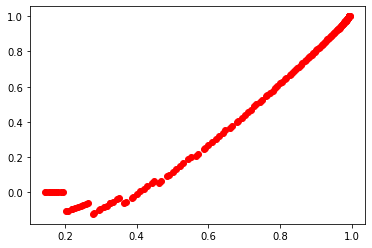

In [7]:
x_tot = []
y_tot = []
high, low = 0.99, 0.2

delta = 0.9 # discount rate
x = 0.5
p = 0.6
q = 0.4
c = 0.5
debug = False # set true to see equations


for x_temp in [0.5, 0.51, 0.62, 0.53, 0.64, 0.55, 0.66, 0.57, 0.68, 0.59]:
    x_plot, y_plot = solve_split_recurrence(x_temp, p,q,c,delta,high,low, debug)
    x_tot += x_plot
    y_tot += y_plot
    
min_x = 1
for i in range(len(x_tot)):
    if y_tot[i] > 0 and x_tot[i] < min_x:
        min_x = x_tot[i]

print("min x is", min_x)

plt.plot(x_tot, y_tot, 'ro')
plt.show()